first, I will  Import the important  packages

In [1]:
#https://www.kaggle.com/uciml/sms-spam-collection-dataset
import pandas as pd
import numpy as np
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

Then, Load the dataset and read on (df)

In [2]:
#read data
df=pd.read_csv(r'D:\assignment#2\spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3694,ham,"Hello, As per request from &lt;#&gt; Rs.5 ha...",NaN,NaN,NaN
4022,ham,Well. Balls. Time to make calls,NaN,NaN,NaN
3233,ham,Yup �_ not comin :-(,NaN,NaN,NaN
5059,ham,I think i am disturbing her da,NaN,NaN,NaN
3968,ham,Thanks for your message. I really appreciate y...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# data cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


since the last three cols have missing value I'll drop them

In [6]:
#drop last three cols
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] ,inplace =True)

In [7]:
df.sample(5)

,v1,v2
4151,ham,What's nannys address?
4450,ham,And that is the problem. You walk around in \j...
2191,ham,Thankyou so much for the call. I appreciate yo...
579,ham,Arngd marriage is while u r walkin unfortuntly...
471,ham,"How long has it been since you screamed, princ..."


In [8]:
#rename the cols
df.rename(columns={'v1':'Target','v2':'Text'},inplace =True)
df.sample(5)

,Target,Text
108,ham,I know! Grumpy old people. My mom was like you...
2133,ham,Spoke with uncle john today. He strongly feels...
4318,ham,Are you still playing with gautham?
1309,ham,"Ok, be careful ! Don't text and drive !"
3613,ham,Ok c �_ then.


In [9]:
#df.groupby('Target').describe().T

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['Target']=encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
#check for duplication values
df.duplicated().sum()

403

In [15]:
#remove duplicated
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

showing the distribution that 87.3% SMS Ham ; e-mail that is not Spam and 12.6% spam

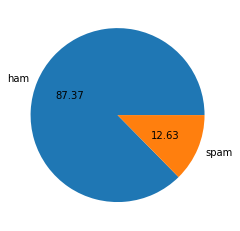

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [21]:
#Data is imbalanced 
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anwaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Feature engineering

In [23]:
df['num_characters']=df['Text'].apply(len)

In [24]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [26]:
#num of words
df['num_words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
#num of sentences 
df['num_sentences']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#discribe the output for ham messages
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#discribe the output for spam messages
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe() # diff BW mean ham and spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

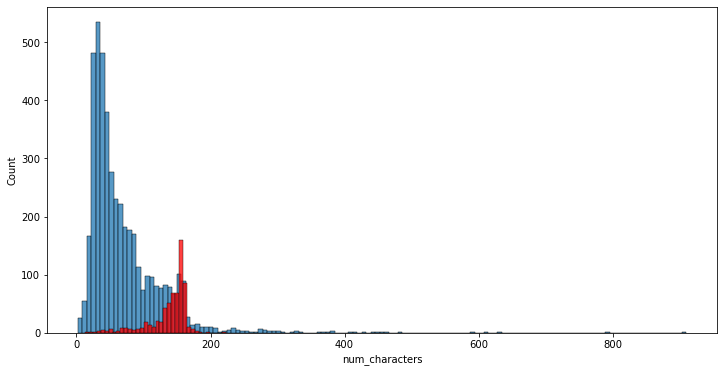

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

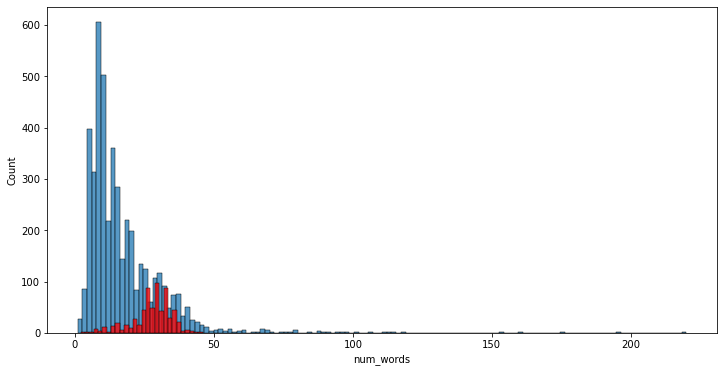

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

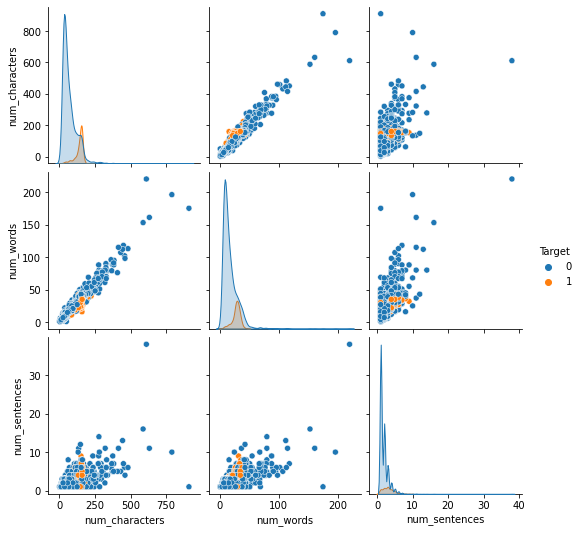

In [36]:
sns.pairplot(df,hue='Target') #0 ham, 1spam

<AxesSubplot:xlabel='Text', ylabel='Target'>

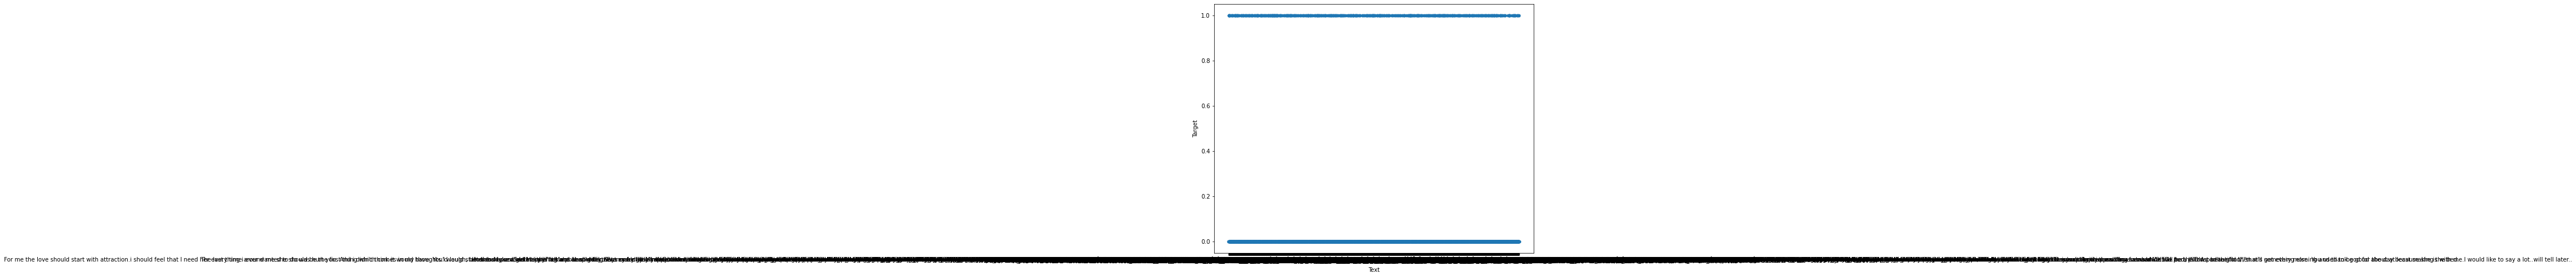

In [37]:
df.plot(kind='scatter',y='Target', x='Text', figsize=(10,8))


In [38]:
df.corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

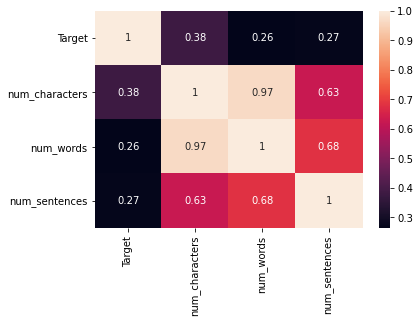

In [39]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing 

In [40]:

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
 



from nltk.corpus import stopwords
import string

#lower case fun
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) # [,] between words
    y=[] #Removing Special characters 
   
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] #Removing stop words and punctuation
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:] #Stemming
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

        
    return " ".join(y)

In [41]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [42]:
#Removing Special characters 
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('LOVING')

'love'

In [44]:
df['transform_text'] = df['Text'].apply(transform_text)

In [45]:
#this is transform text 
df.head() #you can see the diff between text and transform_text colsplt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter')

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud 
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc=wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=" "))

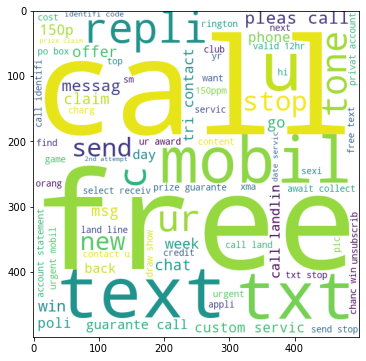

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [49]:
ham_wc=wc.generate(df[df['Target']==0]['transform_text'].str.cat(sep=" "))

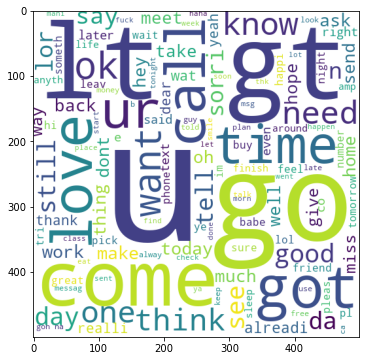

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus=[]
for msg in df[df['Target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9941

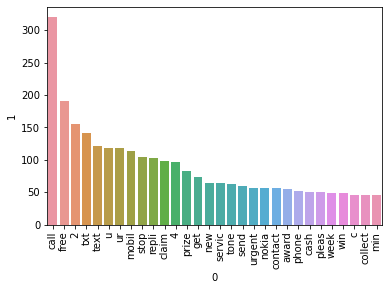

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show() 

In [55]:
ham_corpus=[]
for msg in df[df['Target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35303

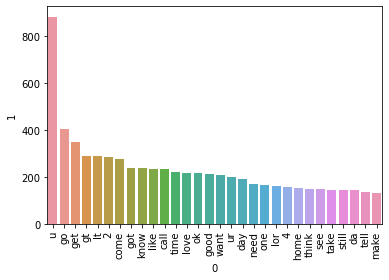

In [57]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show() 

# Model Building

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [59]:
X=cv.fit_transform(df['transform_text']).toarray()


In [60]:
X.shape

(5169, 6677)

In [61]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
y=df['Target'].values


In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
y.shape

(5169,)

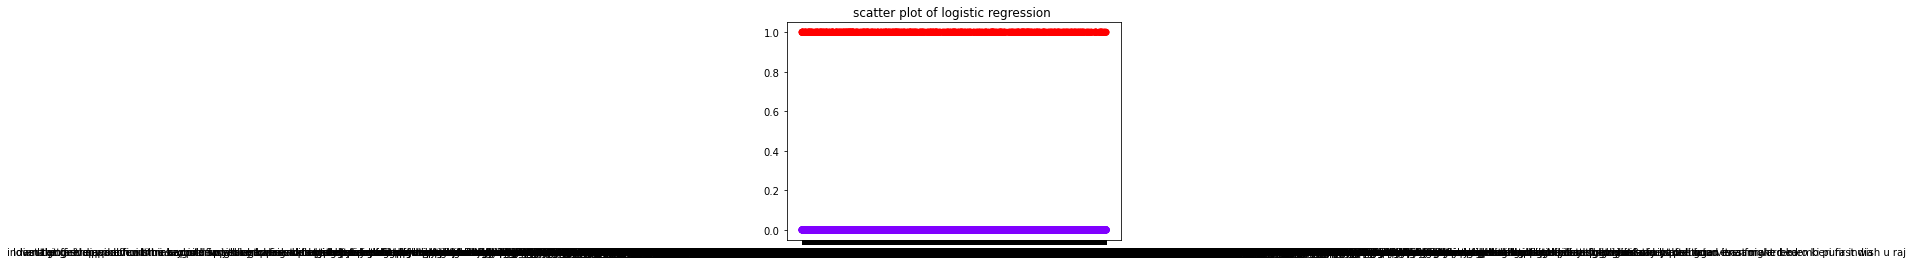

In [101]:
plt.scatter(df.transform_text,df.Target,c=df.Target,cmap="rainbow")
plt.title('scatter plot of logistic regression ')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

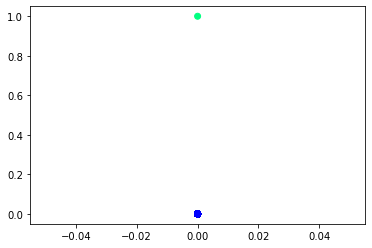

In [207]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter')

# 1- logistic regression model with sklearn

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(X_train,y_train)
pred = Spam_model.predict(X_test)
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))
print (precision_score(y_test,pred))


0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [77]:

import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('num_characters ~ y', data = df).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:         num_characters   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     887.1
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          4.95e-180
Time:                        14:37:46   Log-Likelihood:                -27928.
No. Observations:                5169   AIC:                         5.586e+04
Df Residuals:                    5167   BIC:                         5.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4568      0.800     88.090      0.0

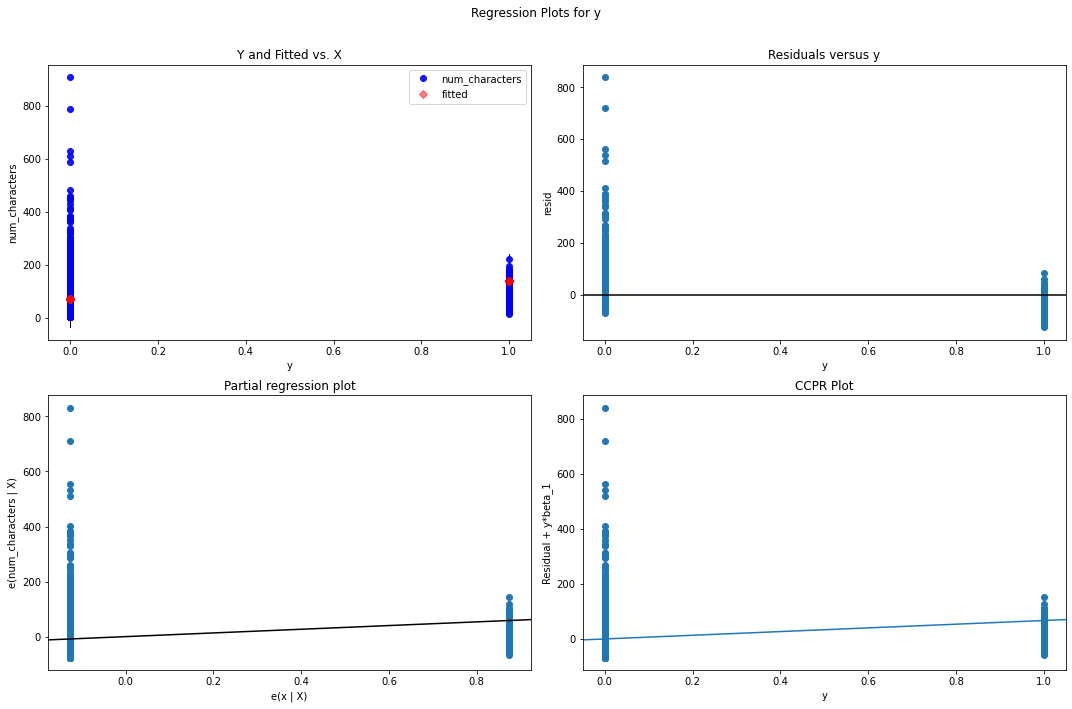

In [76]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'y',fig=fig)

Text(0.5, 1.0, 'Actual vs. predicted')

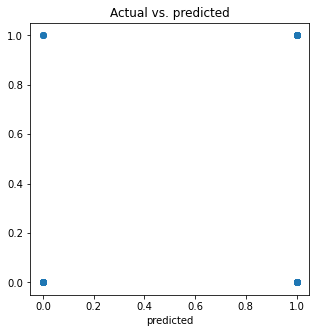

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,pred)

plt.xlabel('Actual')
plt.xlabel('predicted')
plt.title('Actual vs. predicted')


In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.9709864603481625
Precision: 0.9736842105263158
Recall: 0.8043478260869565


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [81]:
def rmse(X_test, y_test):
    return np.sqrt(((y_tes - pred) ** 2).mean())

In [82]:
rmse = (np.sqrt(((y_test - pred) ** 2).mean())) 

In [83]:
print (rmse)

0.17033361280686066


<AxesSubplot:>

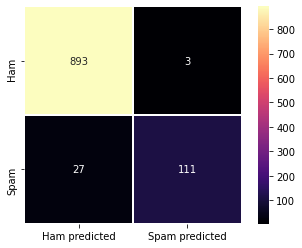

In [100]:

sns.heatmap(confusion_matrix(y_test,pred),
            annot=True, fmt='d', cmap='magma', square=True,linewidths=.5,
            xticklabels=['Ham predicted','Spam predicted'],
           yticklabels=['Ham','Spam'])

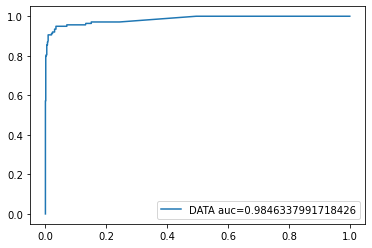

In [80]:
y_pred_proba = Spam_model .predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="DATA auc="+str(auc))
plt.legend(loc=4)
plt.show()


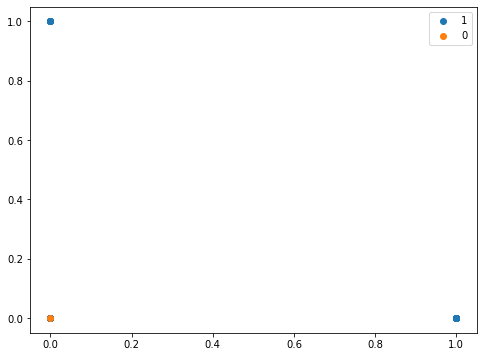

In [84]:
#plotting data points
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[0],X[1], label = '1')

plt.scatter(y[0],y[1], label = '0')

plt.legend()
plt.show()

In [106]:
dataset_ham = dataset[dataset['Type'] == "ham"]
dataset_ham_count = dataset_ham['Message'].str.split().str.len()
dataset_ham_count.index = dataset_ham_count.index.astype(str) + ' words:'
dataset_ham_count.sort_index(inplace=True)

In [107]:
dataset_spam = dataset[dataset['Type'] == "spam"]
dataset_spam_count = dataset_spam['Message'].str.split().str.len()
dataset_spam_count.index = dataset_spam_count.index.astype(str) + ' words:'
dataset_spam_count.sort_index(inplace=True)

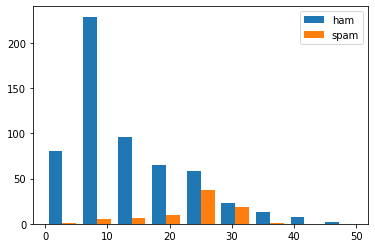

In [109]:
bins = np.linspace(0, 50, 10)

plt.hist([dataset_ham_count, dataset_spam_count], bins, label=['ham', 'spam'])
plt.legend(loc='upper right')
plt.show()

# 2 SVM classifier

In [78]:
# Instantiate the Support Vector Classifier (SVC)
from sklearn.svm import SVC
svc = SVC(C=1.0, random_state=1, kernel='sigmoid',gamma=1.0)
 
# Fit the model
svc.fit(X_train, y_train)

SVC(gamma=1.0, kernel='sigmoid', random_state=1)

In [79]:
import sklearn.metrics as metrics
# Make the predictions
y_predict = svc.predict(X_test)
 
# Measure the performance
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))



Accuracy: 0.9313346228239845
Precision: 0.768
Recall: 0.6956521739130435


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       896
           1       0.77      0.70      0.73       138

    accuracy                           0.93      1034
   macro avg       0.86      0.83      0.85      1034
weighted avg       0.93      0.93      0.93      1034



<AxesSubplot:>

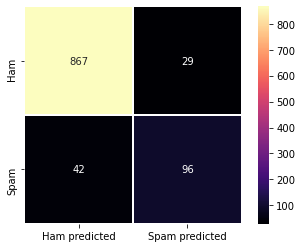

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),
            annot=True, fmt='d', cmap='magma', square=True,linewidths=.5,
            xticklabels=['Ham predicted','Spam predicted'],
           yticklabels=['Ham','Spam'])

In [ ]:
def rmse(X_test, y_test):
    return np.sqrt(((y_test -  y_predict) ** 2).mean())


In [100]:
rmse = (np.sqrt(((y_test -  y_predict) ** 2).mean()))


In [101]:
print (rmse)

0.26204079296173616


# 3 logistic regression my model

In [85]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [86]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (6677, 4135)
Shape of Y_train :  (1, 4135)
Shape of X_test :  (6677, 1034)
Shape of Y_test :  (1, 1034)


In [87]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [88]:

def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [89]:
iterations = 100
learning_rate = 0.1
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  10 iteration is :  0.567729232636471
cost after  20 iteration is :  0.4922970544506436
cost after  30 iteration is :  0.44421672187581085
cost after  40 iteration is :  0.41156016186725164
cost after  50 iteration is :  0.38799233785460396
cost after  60 iteration is :  0.37003001271141694
cost after  70 iteration is :  0.3556788636084203
cost after  80 iteration is :  0.3437517789223898
cost after  90 iteration is :  0.3335168602437285


# Cost vs Iteration Plotting graph to check if the Cost  is decreasing.

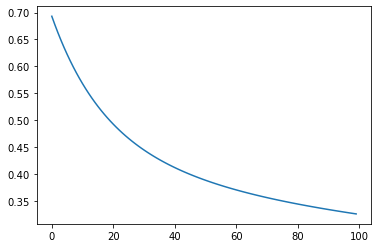

In [119]:
import matplotlib.pyplot as plt
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [120]:
# Model Accuracy
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    return(A,acc)
   
   


In [121]:

accuracy(X_test, y_test, W, B)

(array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64), 86.65377176015474)

In [196]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

AttributeError: 'Text' object has no property 'fountsize'

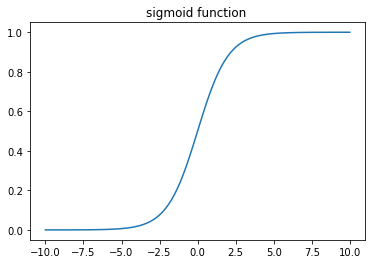

In [200]:

x=np.linspace(-10,10,100)
plt.plot(x,g(x))
plt.title("sigmoid function ",fountsize=30)

# logistic regression with regularization 

In [122]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def model(X, Y, learning_rate, iterations,lambda_value):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    lambda_value=2
    
    v = np.zeros((n,1))
    p = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(v.T, X) + p
        A = sigmoid(Z)
        
         #regularization
        ridge_reg_term = (lambda_value / 2*  m) * np.sum(np.square(v))
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A) )
        
        # Gradient Descent
        ridge_reg_term = (lambda_value /  m) * np.sum(v)
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        v = v - learning_rate*(dW.T)
        p= p - learning_rate*dB+ridge_reg_term
        +ridge_reg_term
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return v, p, cost_list

In [123]:
iterations = 100
learning_rate = 0.1
lambda_value = 0.01
v, p, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations,lambda_value=lambda_value)

cost after  0 iteration is :  0.6931471805599453
cost after  10 iteration is :  0.5665055105152014
cost after  20 iteration is :  0.4890582445820261
cost after  30 iteration is :  0.43940963616650647
cost after  40 iteration is :  0.4057879439113803
cost after  50 iteration is :  0.38174407249107917
cost after  60 iteration is :  0.363648675171188
cost after  70 iteration is :  0.3493863380936115
cost after  80 iteration is :  0.3376808849077404
cost after  90 iteration is :  0.32773852843973117


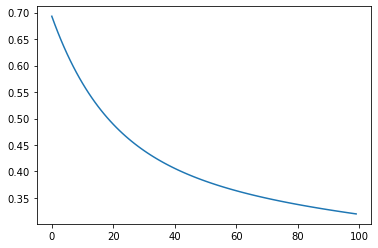

In [124]:
import matplotlib.pyplot as plt
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [125]:
def accuracy(X, Y, v, p):
    
    Z = np.dot(v.T, X) + p
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model with regularization is : ", round(acc, 2), "%")

In [126]:
accuracy(X_test, y_test, v, p)

Accuracy of the model with regularization is :  86.65 %


In [127]:
def rmse(X_test, y_test):
    return np.sqrt(((X_test - y_test) ** 2).mean())

In [128]:
rmse = (np.sqrt(((X_test - y_test) ** 2).mean()))

In [129]:
print (rmse)

0.3663722802337642


# 4 Perceptron model 

In [131]:
#https://www.kaggle.com/uciml/sms-spam-collection-dataset
import pandas as pd
import numpy as np
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [132]:
#read data
df=pd.read_csv(r'D:\assignment#2\spam.csv')

In [133]:
#drop last three cols
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] ,inplace =True)

In [135]:
#rename the cols
df.rename(columns={'v1':'Target','v2':'Text'},inplace =True)

In [136]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [137]:
df['Target']=encoder.fit_transform(df['Target'])

In [138]:
#remove duplicated
df = df.drop_duplicates(keep='first')

In [139]:
import nltk

In [140]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anwaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
df['num_characters']=df['Text'].apply(len)

In [142]:
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [143]:
#num of words
df['num_words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [144]:

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
 



from nltk.corpus import stopwords
import string

#lower case fun
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) # [,] between words
    y=[] #Removing Special characters 
   
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] #Removing stop words and punctuation
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:] #Stemming
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

        
    return " ".join(y)

In [145]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [146]:
#Removing Special characters 
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [147]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('LOVING')

'love'

In [150]:
df['transform_text'] = df['Text'].apply(transform_text) 

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [152]:
X=cv.fit_transform(df['transform_text']).toarray()

In [153]:
y=df['Target'].values

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [155]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (4135, 6677)
Shape of Y_train :  (4135,)
Shape of X_test :  (1034, 6677)
Shape of Y_test :  (1034,)


Perceptron classification accuracy 0.9796905222437138


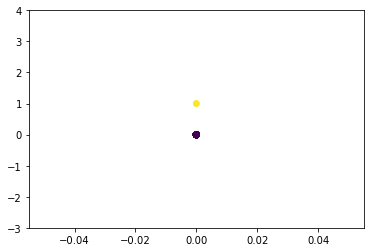

In [156]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.001, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

   

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()
    

In [190]:
def visualize(self,X,y):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0] , X[:,1],c=y)
    
    x0_1 = np.amin(X[:,0])
    x0_2 = np.amin(X[:,0])
    
    x1_1 = (-self.synaptic_wights[0] * x0_1 -self.B)/ self.synaptic_wights[1]
    x1_2 = (-self.synaptic_wights[0] * x0_1 -self.B)/ self.synaptic_wights[1]
    
    ax.plot([x0_1,x0_2] , [x1_1 , x1_2] ,'k')
    
    ymin = np.amin(X[:,1])
    ymax = np.amax(X[:,1])
    plt.show()
    
    
    

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.87      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [158]:
def rmse(X_test, y_test):
    return np.sqrt(((y_test-predictions) ** 2).mean())

In [159]:
rmse = (np.sqrt(((y_test-predictions) ** 2).mean()))

In [160]:
print (rmse)

0.142511325010633


# 5 Naïve Bayes model

In [161]:
import pandas as pd

sms_spam = pd.read_csv('D:\\assignment#2\\data\\SMSSpamCollection.csv', sep='\t',
header=None, names=['Label', 'SMS'])
print(sms_spam.shape)
sms_spam.head()

(5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [162]:
# Randomize the dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


87 percent are ham (non-spam)  whereas  13%  spam .

In [163]:
sms_spam['Label'].value_counts(normalize=True) 

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

To guarantee that spam and ham messages are distributed evenly, randomize the whole dataset before splitting. I split the data into two sets: Use 80% for training and the remains for testing which is  20%  .

In [164]:

# Randomize the dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


In [165]:
training_set['Label'].value_counts(normalize=True)

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

In [166]:
test_set['Label'].value_counts(normalize=True)

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

In [167]:
# Before cleaning
training_set.head(3)

,Label,SMS
0,ham,"Yep, by the pretty sculpture"
1,ham,"Yes, princess. Are you going to make me moan?"
2,ham,Welp apparently he retired


When a new message is received, the multinomial Naive Bayes algorithm classifies it using the results it obtains from various probabilistic equations.

In [168]:
# After cleaning
training_set['SMS'] = training_set['SMS'].str.replace(
   '\W', ' ') # Removes punctuation
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head(3)

,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired


In [169]:
training_set['SMS'] = training_set['SMS'].str.split()

vocabulary = []
for sms in training_set['SMS']:
    for word in sms:
        vocabulary.append(word)
vocabulary = list(set(vocabulary))




In [170]:
len(vocabulary)

7783

create dictionary for the training set

In [171]:
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [172]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,kittum,shrek,taunton,petey,kb,pobox84,filthy,answered,domain,doubletxt,...,years,received,game,ghodbandar,terrific,stamped,andros,cann,spelling,40mph
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()

,Label,SMS,kittum,shrek,taunton,petey,kb,pobox84,filthy,answered,...,years,received,game,ghodbandar,terrific,stamped,andros,cann,spelling,40mph
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using the formulae, compute P(wi|Spam) and P(wi|Ham).

In [174]:
# first I will separat spam and ham messages 
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

calculating the parameters P(wi|Spam) and P(wi|Ham) and P(wi|Spam) and P(wi|Ham) depending on the individual words and  Each word in the dictionary has a conditional probability value associated with it.

In [175]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary: 
    n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
    p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
    parameters_spam[word] = p_word_given_spam

    n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
    p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
    parameters_ham[word] = p_word_given_ham

then Compares of P(Spam|wi) and P(Ham|wi), and the message will be classified as ham message If  P(Ham|w1, w2,wn) > P(Spam|w1, w2, ..., wn), the message will be classified as spam message if P(Ham|w1, w2,wn) < P(Spam|w1, w2, ..., wn), and the algorithm may need help from human  If  P(Ham|w1, w2,wn) = P(Spam|w1, w2, ..., wn) however, If new messages have word not a part of the vocabulary, we ignore it 

In [176]:
import re

def classify(message):
    
   
    #message: a string
   

    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]

        if word in parameters_ham: 
            p_ham_given_message *= parameters_ham[word]

    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)

    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')

now I try to test the spam filter on 3 new messages to see how its work and see the results

In [177]:
classify('WINNER!! This is the secret code to unlock the money: C3421.') 

P(Spam|message): 1.3481290211300841e-25
P(Ham|message): 1.9368049028589875e-27
Label: Spam


In [178]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.4372375665888117e-25
P(Ham|message): 3.687530435009238e-21
Label: Ham


In [179]:
classify("hello doctor,hope you doing well.could you please give me the full mark :) ")

P(Spam|message): 5.1620729444590584e-49
P(Ham|message): 2.0428748331731523e-40
Label: Ham


instead of printing the classification , I want function that returns them as HAM and SPAM 

In [180]:
def classify_test_set(message):
  
   #message: a string
   

    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]

        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]

    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [181]:
test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


so, to check the accuracy I will apply the the following EQ = number of classified messages / total number of classified messages

In [182]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == row['predicted']:
        correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)
 

Correct: 1100
Incorrect: 14
Accuracy: 0.9874326750448833


so, the Naïve Bayes model got an accuracy close to 98.74%, which is good. The spam filter looked at 1,114 messages that it hasn't seen in training, and classified 1,100 correctly and 14 incorrectly.

# 6 Gaussian Discriminant Analysis (GDA)

In [186]:
class GaussianDiscAnalysis:
  
    def __init__(self, lambd=1e-10):
        self.lambd = lambd
        
    def compute_phi(self, y):
        n = len(y)
        phi = dict()
        for idx in range(self.num_classes):
            phi[idx] = (1/n) * np.sum(y==self.classes[idx])
        return phi
    
    def compute_mu(self, X, y):
        mu_dict = dict()
        for idx in range(self.num_classes):
            # Add mu for each class
            mu_dict[idx] = np.sum(X[y==self.classes[idx]], axis=0)/ np.sum(y==self.classes[idx])
        return mu_dict

    def compute_sigma(self, X, y):
        n = len(X)
        #y = y.reshape(-1,1)
        Xmu = X.copy()
        for idx in range(self.num_classes):
            Xmu = Xmu \
              - self.mu[idx]*np.ones_like(Xmu)*(y==self.classes[idx]).reshape(-1,1)
        return (1/n) * Xmu.T@Xmu
    
    
    def compute_Pxyi(self, X, idx):
        """Probability of X given y"""
        d = X.shape[1]
        sigma_inv = np.linalg.inv(self.sigma)
        det_sigma = np.linalg.det(self.sigma)
        #mu_i = mu(X, y, idx)
        Pxi = (1/((2*np.pi)**(d/2))) \
                *(1/(det_sigma**0.5)) \
                * np.exp(- 0.5*np.sum(((X-self.mu[idx])@sigma_inv)*(X-self.mu[idx]), axis=1))
    #     Pxi = np.log(1) \
    #             - np.log((2*np.pi)**(m/2)) \
    #             - np.log(np.sqrt(det_sigma)) \
    #             - np.sum(((X-mu_i)@sigma_inv)*(X-mu_i), axis=1)
        return Pxi
    
    def fit(self, X, y):
        """Computes mean, covariance and proabilities of y (phi)"""
        d = X.shape[1]
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)
        self.mu = self.compute_mu(X, y)
        self.sigma = self.compute_sigma(X, y) + self.lambd*np.eye(d,d)
        self.phi = self.compute_phi(y)
        
    def predict_proba(self, X):
        """Computes the probability of example belonging to that class"""
        n = len(X)
        Pyi = np.zeros((n, self.num_classes))
        
        for idx in range(self.num_classes):
            #print(self.compute_Pxyi(X, idx))
            py_i = self.compute_Pxyi(X, idx) * self.phi[idx]
            Pyi[:, idx] = py_i
        return Pyi
    
    def predict(self, X):
        proba = self.predict_proba(X)
        class_indexes = np.argmax(proba, axis=1)
        
        # Replace index with class predictions
        vfunc = np.vectorize(lambda x: self.classes[x])
        class_predictions = vfunc(class_indexes)
        return class_predictions                           
    
    def generate_data(self, class_id, num_samples=1):
        """Generates new unseen dataset from a normal distribution
            given the mean of class and covariance
        """
        mean = self.mu[class_id]
        cov = self.sigma
        return np.random.multivariate_normal(mean, cov, num_samples)

In [187]:
GDA = GaussianDiscAnalysis()

In [188]:
GDA.fit(X_train, y_train)

In [189]:
predictions = GDA.predict(X_train) 

OverflowError: (34, 'Result too large')

I tried all I could to fix this mistake, but it was in vain. As far as I know, some algorithms don't perform well with certain types of data, thus I presume my data is one of them.